Here, we are taking the data set, preforming PCA analysis, then using the reduced dimensionality dataset to do a k- nearest- neighbors method.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
def clean_data(df):
    remove_numeric_columns =  ['Unnamed: 0', 'shotID', 'game_id', 'id', 'goalieIdForShot','shooterPlayerId', 'HOMEZONE', 'AWAYZONE','location_Unknown','xCord','yCord','shotGeneratedRebound','homeTeamGoals','awayTeamGoals','xGoal', 'xFroze','xRebound','xPlayContinuedInZone','xPlayContinuedOutsideZone','xShotWasOnGoal', 'shotAngle', 'shotAngleReboundRoyalRoad','defendingTeamDefencemenOnIce', 'timeDifferenceSinceChange', 'averageRestDifference']

    cleaned_df = df.select_dtypes(include=np.number)
    return cleaned_df.drop(columns=remove_numeric_columns)


In [5]:
dat = pd.read_csv('training_data.csv')
data = clean_data(dat)

In [6]:
data.head()

,season,isPlayoffGame,homeTeamWon,time,timeUntilNextEvent,timeSinceLastEvent,period,goal,shotPlayContinuedOutsideZone,shotPlayContinuedInZone,...,arenaAdjustedXCord,arenaAdjustedYCord,arenaAdjustedYCordAbs,xPlayStopped,isHomeTeam,shotWasOnGoal,arenaAdjustedXCordABS,location_AWAYZONE,location_HOMEZONE,location_Neu. Zone
0,2016,0,0,2144,1.0,1,2,0,0.0,0,...,-82.0,4.0,4.0,0.036556,1.0,1.0,82.0,1.0,0.0,0.0
1,2009,0,1,3399,80.0,48,3,0,1.0,0,...,-72.0,14.0,14.0,0.022210,1.0,1.0,72.0,1.0,0.0,0.0
2,2015,0,0,2306,32.0,30,2,0,1.0,0,...,74.0,-14.0,14.0,0.019629,0.0,0.0,74.0,0.0,1.0,0.0
3,2016,0,1,2835,1.0,34,3,0,0.0,0,...,84.0,7.0,7.0,0.017266,1.0,1.0,84.0,1.0,0.0,0.0
4,2012,0,1,2983,28.0,6,3,0,1.0,0,...,63.0,-3.0,3.0,0.023554,0.0,0.0,63.0,0.0,1.0,0.0


In [6]:
def pca_analysis(data, max_components):
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(data)

  pca_df = []
  for i in range(1, max_components+1):
    pca = PCA(n_components=i)
    temp = pca.fit_transform(scaled_data)
    explained_variance = pca.explained_variance_ratio_
    total_explained_variance = explained_variance.sum()
    pca_df.append(total_explained_variance)
    print('Number of components:', i)
    print('Explained variance:', total_explained_variance)
  pca_df = pd.DataFrame({'Explained Variance': pca_df})
  return pca_df

Number of components: 1
Explained variance: 0.17764675177684008
Number of components: 2
Explained variance: 0.2373265839806585
Number of components: 3
Explained variance: 0.28802031741243017
Number of components: 4
Explained variance: 0.3232641743036894
Number of components: 5
Explained variance: 0.3573097527153989
Number of components: 6
Explained variance: 0.38828678323187465
Number of components: 7
Explained variance: 0.41779312342459607
Number of components: 8
Explained variance: 0.44612690225616053
Number of components: 9
Explained variance: 0.4687230480590351
Number of components: 10
Explained variance: 0.49010560116203084
Number of components: 11
Explained variance: 0.5107509660868688
Number of components: 12
Explained variance: 0.5306879179464317
Number of components: 13
Explained variance: 0.5490790502893242
Number of components: 14
Explained variance: 0.566691053956718
Number of components: 15
Explained variance: 0.5837829894500562
Number of components: 16
Explained variance:

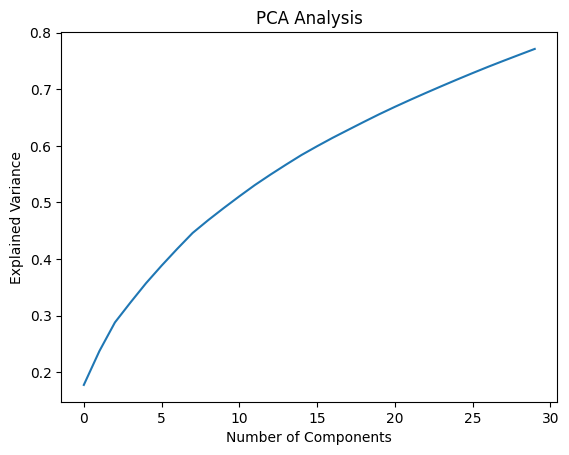

In [7]:
pca_df = pca_analysis(data,30)
print(pca_df)
plt.plot(pca_df)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('PCA Analysis')
plt.show()


In [8]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=30)  # Choose the number of components
pca.fit(scaled_data)

# Transform the data
transformed_data = pca.transform(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

print("Original data:\n", data)
print("\nStandardized data:\n", scaled_data)
print("\nTransformed data:\n", transformed_data)
print("\nExplained variance ratio:\n", explained_variance)
print("\nExplained variance:\n", explained_variance.sum())

Original data:
          season  isPlayoffGame  homeTeamWon  time  timeUntilNextEvent  \
0          2016              0            0  2144                 1.0   
1          2009              0            1  3399                80.0   
2          2015              0            0  2306                32.0   
3          2016              0            1  2835                 1.0   
4          2012              0            1  2983                28.0   
...         ...            ...          ...   ...                 ...   
1472169    2019              0            0   885                 1.0   
1472170    2017              1            0  2970                 0.0   
1472171    2019              0            1  2298                 7.0   
1472172    2019              0            0  3515                 1.0   
1472173    2022              0            0  3348                 0.0   

         timeSinceLastEvent  period  goal  shotPlayContinuedOutsideZone  \
0                         1     

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_train = dat['goal']
X_train = transformed_data
knn_model = KNeighborsClassifier(n_neighbors=5)  # Set k to 5 (adjust as needed)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [11]:
y_train = dat['goal']
X_train = transformed_data
knn_model = KNeighborsClassifier(n_neighbors=2)  # Set k to 5 (adjust as needed)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [12]:
# Make predictions on the test data
dat_test = pd.read_csv('validation_data.csv')
data_test = clean_data(dat_test)

# Standardize the data
scaler = StandardScaler()
scaled_data_test = scaler.fit_transform(data_test)

# Apply PCA
pca = PCA(n_components=30)  # Choose the number of components
pca.fit(scaled_data_test)

# Transform the data
transformed_data_test = pca.transform(scaled_data_test)


X_test = transformed_data_test
y_test = dat_test['goal']
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

: 

: 

In [20]:
# Make predictions on the test data
dat_test = pd.read_csv('validation_data.csv')
data_test = clean_data(dat_test)

# Standardize the data
scaler = StandardScaler()
scaled_data_test = scaler.fit_transform(data_test)

# Apply PCA
pca = PCA(n_components=10)  # Choose the number of components
pca.fit(scaled_data_test)

# Transform the data
transformed_data_test = pca.transform(scaled_data_test)


X_test = transformed_data_test
y_test = dat_test['goal']
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.936787449326711
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    343379
           1       0.58      0.20      0.30     24665

    accuracy                           0.94    368044
   macro avg       0.76      0.60      0.63    368044
weighted avg       0.92      0.94      0.92    368044

[[339793   3586]
 [ 19679   4986]]


In [21]:
from sklearn.svm import SVC


In [ ]:
svm_clf = SVC(kernel="linear",gamma='scale', C=1)
svm_clf.fit(X_train, y_train)

######################Predictions
y_pred = svm_clf.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9271255610742194
              precision    recall  f1-score   support

           0       0.95      0.98      0.96    343379
           1       0.41      0.21      0.28     24665

    accuracy                           0.93    368044
   macro avg       0.68      0.60      0.62    368044
weighted avg       0.91      0.93      0.92    368044

[[335964   7415]
 [ 19406   5259]]
Accuracy: 0.9350648292052037
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    343379
           1       0.67      0.06      0.11     24665

    accuracy                           0.94    368044
   macro avg       0.80      0.53      0.54    368044
weighted avg       0.92      0.94      0.91    368044

[[342627    752]
 [ 23147   1518]]
Accuracy: 0.9363717381617416
              precision    recall  f1-score   support

           0       0.94      0.99      0.97    343379
           1       0.62      0.13      0.21     24665

    accuracy             

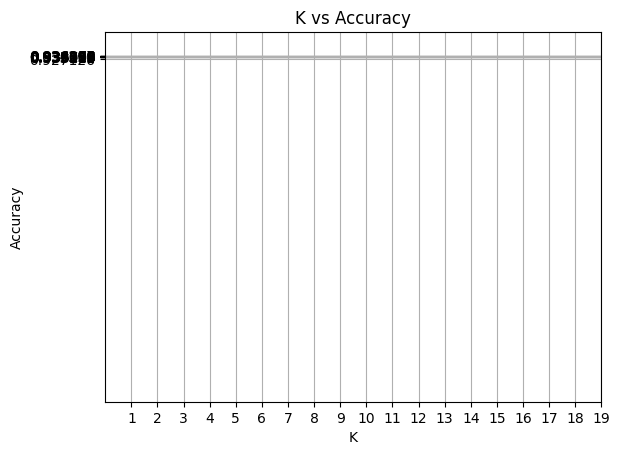

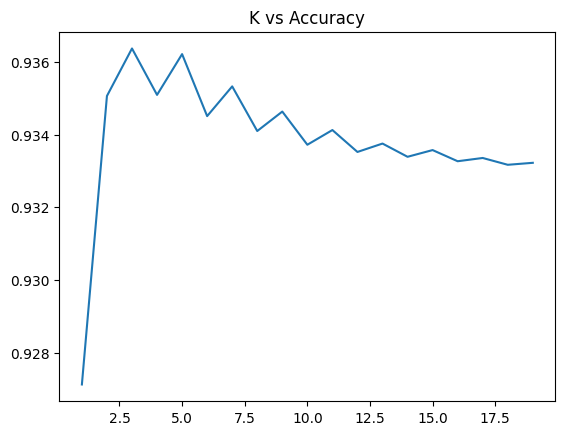

In [18]:
#with the hyperparameter of K, we will make 5 models and evaluate the accuracy of each.
#let's make the data smaller to reduce comp time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
k = []
acc = []
y_train = dat['goal'].sample(n=1000, random_state=42)
X_train = pd.DataFrame(transformed_data).sample(n=1000, random_state=42).to_numpy()
for i in range(1, 20):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)

    # Make predictions on the test data
    dat_test = pd.read_csv('validation_data.csv')
    data_test = clean_data(dat_test)

    # Standardize the data
    scaler = StandardScaler()
    scaled_data_test = scaler.fit_transform(data_test)

    # Apply PCA
    pca = PCA(n_components=30)  # Choose the number of components
    pca.fit(scaled_data_test)

    # Transform the data
    transformed_data_test = pca.transform(scaled_data_test)


    X_test = transformed_data_test
    y_test = dat_test['goal']
    y_pred = knn_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    acc.append(accuracy)
    k.append(i)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.xticks(k)
plt.yticks(acc)
plt.grid()
plt.show()
plt.title('K vs Accuracy')
plt.plot(k, acc)



Text(0, 0.5, 'Accuracy')

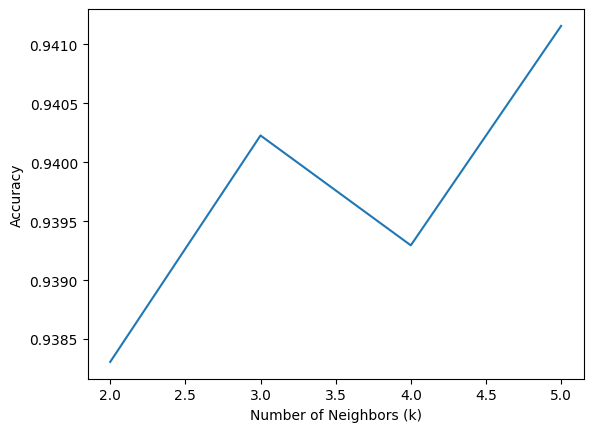

In [16]:
k = [2,3,4, 5]
acc = [0.93830628946539, 0.9402272554368499, 0.9392953016487159, 0.9411564921585462]
plt.plot(k, acc)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')